In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

givenPoints = np.array ( 
    [[-171.60,4.00,0.00],
[-206.40,4.20,0.00],
[-255.90,0.20,0.00],
[-272.10,-43.90,0.00],
[-205.50,-95.00,0.00],
[-185.50,-142.40,0.00],
[-151.10,-151.00,0.00],
[-101.40,-154.70,0.00],
[-47.80,-117.20,0.00],
[-43.80,-56.80,0.00],
[-43.90,-17.10,0.00],
[3.00,-2.70,0.00],
[47.80,-1.80,0.00],
[89.00,-5.50,0.00],
[45.90,-84.90,0.00],
[31.30,19.30,0.00],
[36.30,67.20,0.00],
[38.60,155.10,0.00],
[74.00,190.20,0.00],
[154.10,177.30,0.00],
[189.20,52.80,0.00],
[174.40,-148.00,0.00],
[10.20,-187.90,0.00],
[-145.80,-190.90,8.60],
[-232.60,28.10,10.00],
[-119.40,186.60,10.00],
[84.70,144.10,0.00],
[148.10,112.20,0.00],
[151.40,15.20,0.00],
[124.70,1.90,0.00],
[96.20,-28.60,0.00],
[-9.50,-88.30,0.00],
[-83.20,-87.70,0.00],
[-124.30,-42.40,0.00],
[-121.80,28.10,0.00],
[-124.40,106.30,0.00],
[-80.20,133.30,0.00],
[-20.70,87.90,0.00],
[25.70,65.40,0.00],
[24.60,-30.70,0.00]
])


edges = np.array([[28,29],
[58,29],
[30,58],
[30,52],
[52,14],
[52,31],
[31,68],
 [68,15],
[15,46],
[46,32],
[46,45],
[44,45],
[58,44],
[52,48],
[48,49],
[18,49],
[14,13],
[13,47],
[47,16],
[12,47],
[47,40],
[40,46],
[16,39],
[39,17],
[17,49],
[38,49],
[50,38],
[12,53],
[50,37],
[37,57],
[23,67],
[67,45],
[8,9],
[59,9],
[33,59],
[59,10],
[10,11],
[11,53],
[53,50],
[50,51],
[51,36],
[19,43],
[36,57],
[51,35],
[19,20],
[54,53],
[54,35],
[34,55],
[55,33],
[54,1],
[1,64],
[57,63],
[63,62],
[62,64],
[62,65],
[65,3],
[64,2],
[2,3],
[3,4],
[4,60],
[60,5],
[5,66],
[66,55],
[61,25],
[51,62],
[25,41],
[41,24],
[24,23],
[67,22],
[22,21],
[21,21],
[32,59],
[6,66],
[43,18],
[34,54],
[26,43],
[26,42],
[6,7],
[7,56],
[56,8],
[20,21],
[42,61],
[18,27],
[27,28],
[56,55],
[64,66]
])

intersections = np.array ( [
    [-229, -143],
 [-210 , 156],
 [  38 , 187],
 [ 140 ,-123],
 [  35 ,-141],
 [  35 , -92],
 [  29 ,  -3],
 [  96 ,  72],
 [  37 ,  91],
 [ -44 ,  88],
 [-121 ,  85],
 [ 105 ,  -3],
 [ -40 ,   2],
 [-119 ,  -4],
 [-121 , -93],
 [-121, -147],
 [-120 , 138],
 [ 154 ,  -6],
 [ -44 , -89],
 [-244,  -86],
 [-243 ,  82],
 [-186  , 88],
 [-173 , 137],
 [-186 ,   2],
 [-247  , 76],
 [-184 , -93],
 [  35 ,-189],
 [  92 , -72]
 ])

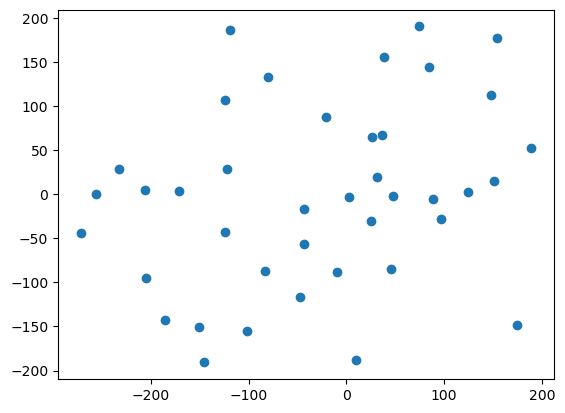

In [89]:
y = givenPoints[:,0:2]


plt.scatter(y[:,0],y[:,1])
plt.show()

In [90]:
def traslate(point,a=1.45,b=399,c =-1.44 ,d =308):
    x,y = point
    return int (a*x+b) ,  int (c*y+d)

In [91]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 0.5
fontColor              = (255,0,0)
thickness              = 1
lineType               = 1


img = cv2.imread("img.png")
c = 1

for x,y,_ in givenPoints:
    x,y = traslate(point=(x,y))

    bottomLeftCornerOfText = (x+12,y+12)
    cv2.putText(img, str(c), bottomLeftCornerOfText, font,fontScale,fontColor,thickness, lineType)
    img = cv2.circle(img, (x, y), 3, (00,255,255), 2)
    c+=1



In [92]:
def get_point(s):
    s-=1
    if (s>39):
        point = (intersections[s%40][0],intersections[s%40][1])
    else:
        point = (givenPoints[s][0],givenPoints[s][1])
        
    return point

True

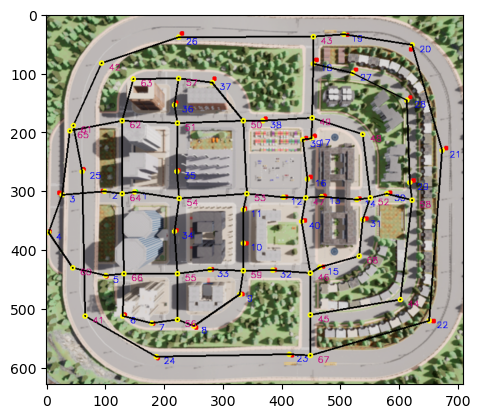

In [93]:

NewC = c
imgcopy = img

for s,d in edges:    
    cv2.line(imgcopy, traslate(point= get_point(s)), traslate(point= get_point(d)), (0,0,0), 2)
    
for x,y in intersections:
    x,y = traslate(point= (x, y))

    bottomLeftCornerOfText = (x+12,y+12)
    cv2.circle(imgcopy, (x, y), 3, (00,255,255), 2)
    cv2.putText(imgcopy, str(NewC), bottomLeftCornerOfText, font,fontScale,(120,0,200),thickness, lineType)
    
    NewC+=1

plt.imshow(imgcopy[:,:,::-1])

cv2.imwrite('out.png', imgcopy)

In [94]:
graphList = {}


for s, d in edges:
    
    dis = math.dist(get_point(s),get_point(d))
    if str(s) in graphList and  str(d) in graphList:
        graphList[str(s)].append((d,dis))
        graphList[str(d)].append((s,dis))
        
    elif str(s) in graphList:
        graphList[str(s)].append((d,dis))
        graphList[str(d)] = [(s,dis)]
    elif str(d) in graphList: 
        graphList[str(d)].append((s,dis))
        graphList[str(s)] = [(d,dis)]     
    else:
        graphList[str(s)] = [(d,dis)]
        graphList[str(d)] = [(s,dis)]   
        
print(type (graphList["53"][0][1]))             
    

<class 'float'>


In [117]:
TotalNodeCount = givenPoints.shape[0] + intersections.shape[0]

graphMarix = np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=float)
graphMarix = graphMarix * float('inf')

for s, d in edges:
    dis = math.dist(get_point(s),get_point(d))
    
    graphMarix[s][d] = dis
    graphMarix[d][s] = dis

np.fill_diagonal(graphMarix,0)
graphMarix[0][0] = float('inf')




0
1
2
3
4


In [126]:
dp = graphMarix

next =  np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=int)
next = next * -1

for j in range (1, TotalNodeCount+1):
    for i in range (1, TotalNodeCount+1):
        if (dp[j][i] != float('inf') ):
            next[j][i] = i 


-1


In [127]:
for k in range (1, TotalNodeCount+1):
    for j in range (1, TotalNodeCount+1):
        for i in range (1, TotalNodeCount+1):
            if (dp[j][k]  + dp[k][i] < dp[j][i] ):
               dp[j][i] =  dp[j][k]  + dp[k][i]
               next[j][i] = next[j][k] 
               
               
               
dp[33][33]
                

0.0

In [120]:
'''

def add(x, y):
    global intersections
    intersections = np.vstack([intersections, [x,y]])
    return


def nothing(y):
    pass



cv2.namedWindow('img')

cv2.createTrackbar('x', 'img',-300,600,nothing)
cv2.createTrackbar('y', 'img',-300,600,nothing)


while True:
    x = cv2.getTrackbarPos('x', 'img')-300
    y = cv2.getTrackbarPos('y', 'img')-300


    imgr = cv2.imread("img.png")

    
    imgr = cv2.circle(imgr, traslate( point=(x, y)), 15, (255, 0, 0), 2)

    for i,j in intersections:
        imgr = cv2.circle(imgr, traslate (point=(i, j)), 15, (255, 255, 0), 2)

    
    cv2.imshow('img',imgr)

    k = cv2.waitKey(1)
    if k==ord('q'):
        break
    elif k==ord('s'):
        add(x,y)

cv2.destroyAllWindows()
print(intersections)'''


'\n\ndef add(x, y):\n    global intersections\n    intersections = np.vstack([intersections, [x,y]])\n    return\n\n\ndef nothing(y):\n    pass\n\n\n\ncv2.namedWindow(\'img\')\n\ncv2.createTrackbar(\'x\', \'img\',-300,600,nothing)\ncv2.createTrackbar(\'y\', \'img\',-300,600,nothing)\n\n\nwhile True:\n    x = cv2.getTrackbarPos(\'x\', \'img\')-300\n    y = cv2.getTrackbarPos(\'y\', \'img\')-300\n\n\n    imgr = cv2.imread("img.png")\n\n    \n    imgr = cv2.circle(imgr, traslate( point=(x, y)), 15, (255, 0, 0), 2)\n\n    for i,j in intersections:\n        imgr = cv2.circle(imgr, traslate (point=(i, j)), 15, (255, 255, 0), 2)\n\n    \n    cv2.imshow(\'img\',imgr)\n\n    k = cv2.waitKey(1)\n    if k==ord(\'q\'):\n        break\n    elif k==ord(\'s\'):\n        add(x,y)\n\ncv2.destroyAllWindows()\nprint(intersections)'